# Лабораторная работа №1

# Назаров Рустам

# М3232 368563

# Вариант: 18

## Аналитический метод

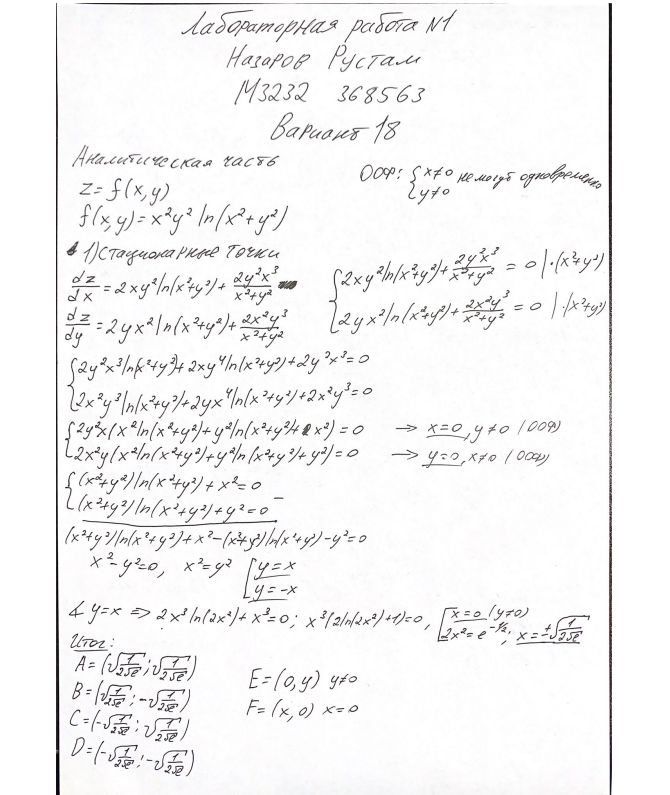

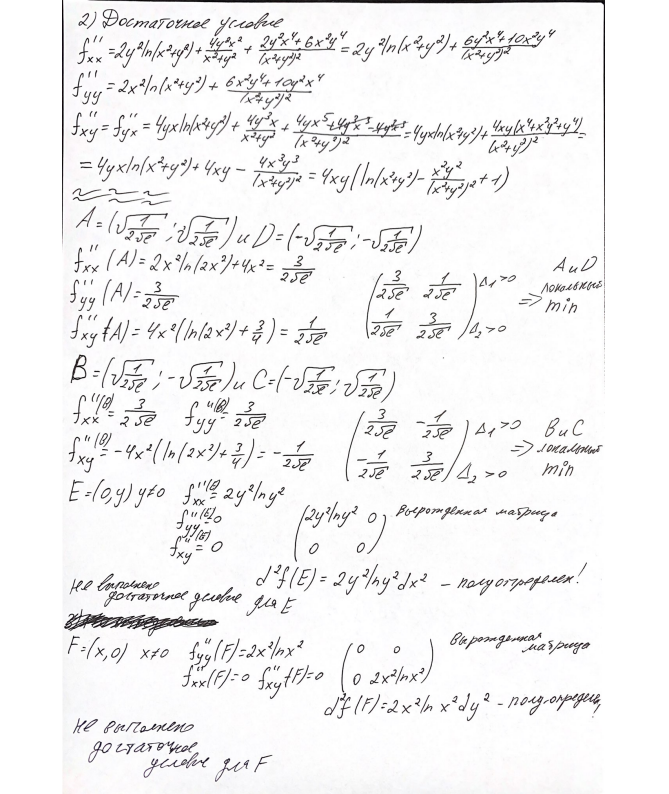

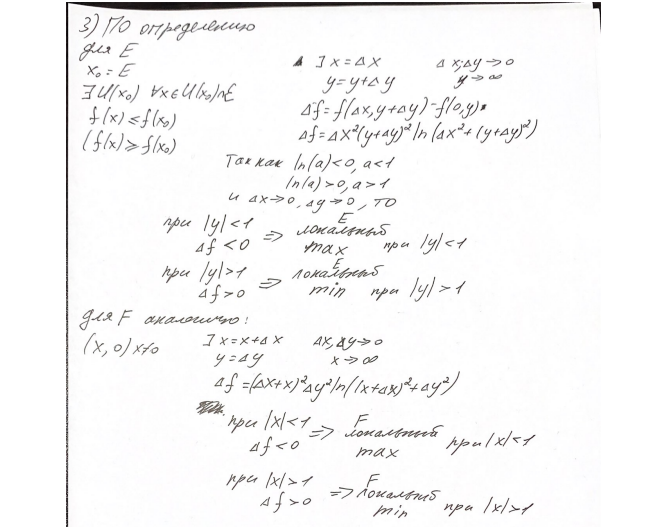

## Численный метод

## Отоборазим на функции наши Стационарные точки.
## Красные: A, B, C, D
## Желтые и Зеленые: E, F

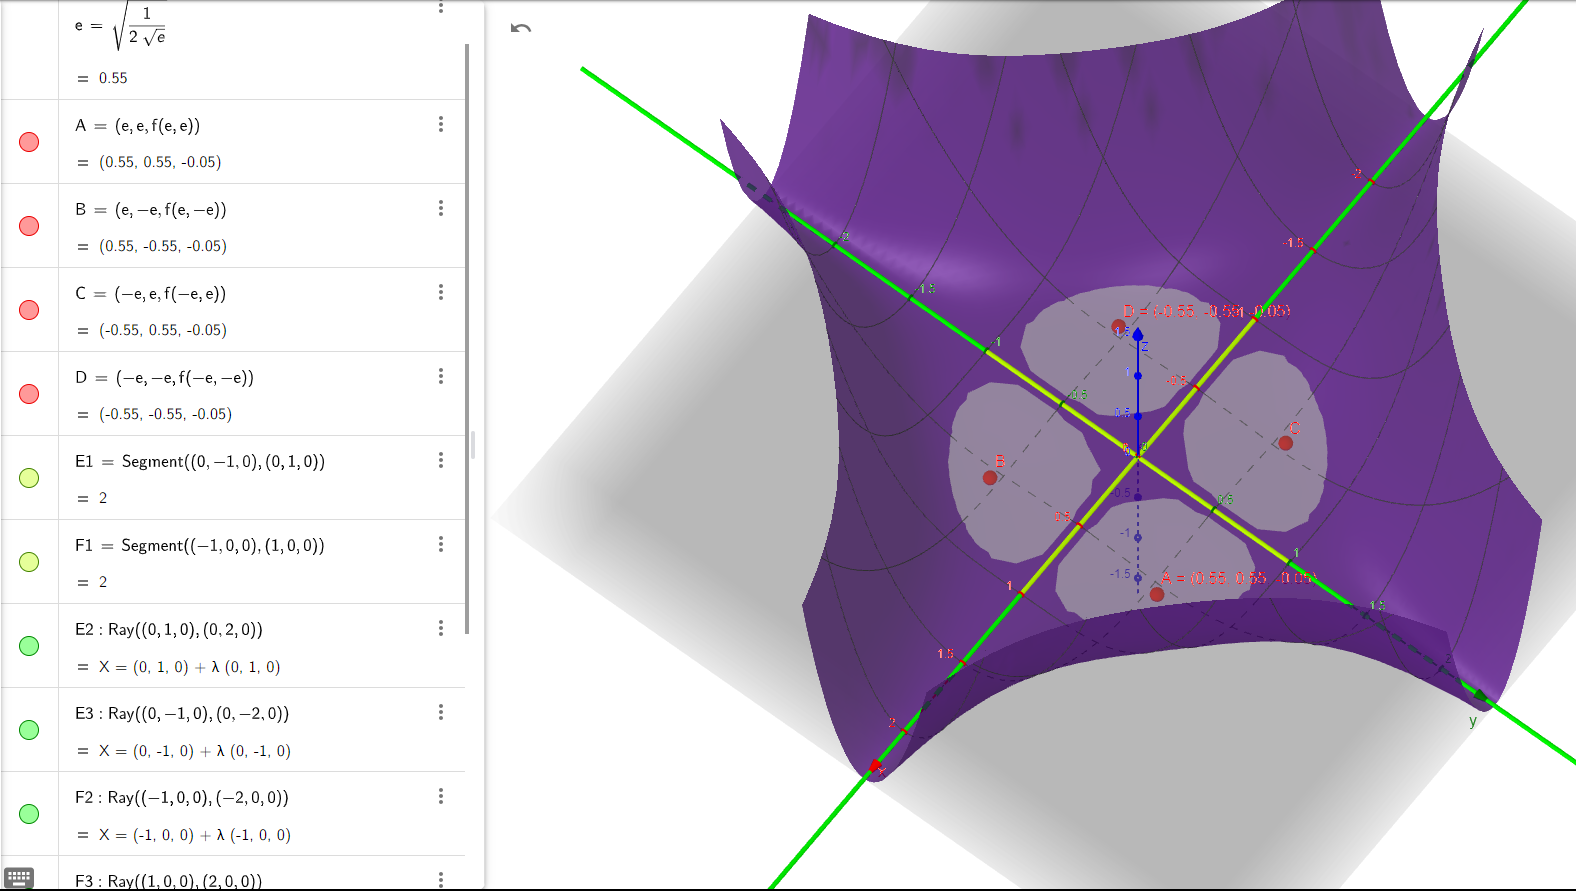

## Отобразим линии уровня. То есть приравняем f(x, y) = C. C={-0.4, 0, 1, 2}, так как f(x, y) не ниже ~-0.05

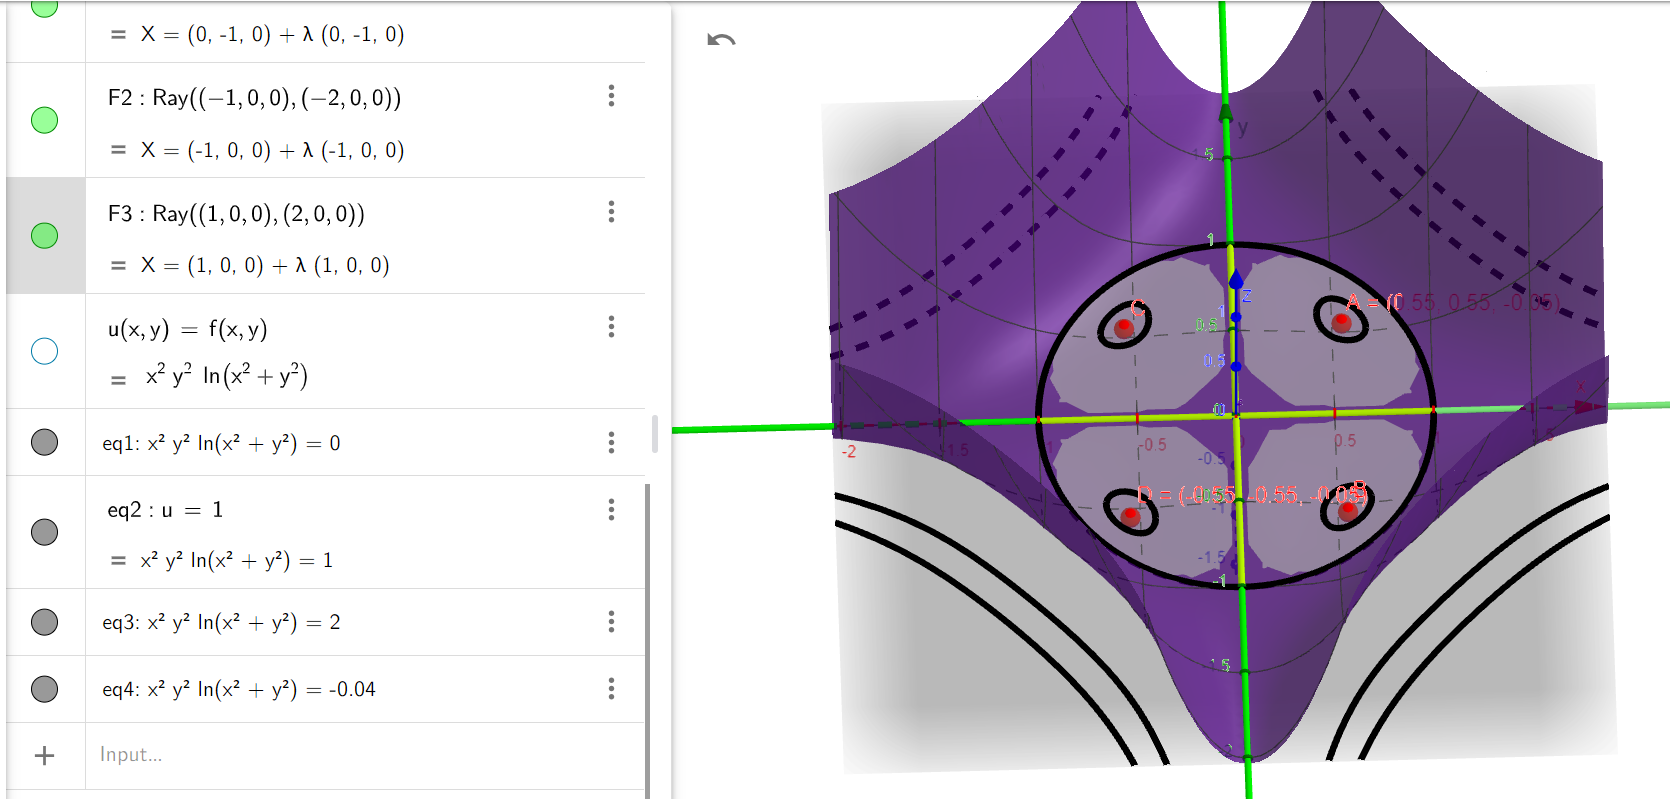

### Видно как при уменьшении С круги приближаются к 4 точкам A, B, C, D. И как в С=0 это круг с радиусом 1, где наши E, F переходят из максимума в минимум

In [42]:
#Импорты
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import matplotlib.lines as mlines

In [43]:
# Определяем переменные
x, y = sp.symbols('x y')

# Определяем функцию
f = x ** 2 * y ** 2 * sp.log(x ** 2 + y ** 2)

## Условие останова: Если приращение функции меньше eps или приращение двух аргументов меньше beta, то останавливаем интерации. Так как, если разница между предыдущим значением и текущим очень мала, то мы подошли почти впритык к екстремуме и дальше итерироваться бессмысленно

In [44]:
epsilon = 0.000000001  # условие остановки на основе приращения функции
beta = 0.000000001  # условие остановки на основе приращения аргумента

## Интерации по вычислению точек. Стремимся к точке А

In [245]:
# градиент
grad_f = sp.Matrix([f.diff(var) for var in (x, y)])

# Определяем начальную точку и скорость уменьшения шага
x_k, y_k = 0.1, 0.1
a_k = 0.3 # Постоянное

f_val_prev = f.subs({x: x_k, y: y_k}).evalf()  # Значение функции на начальном шаге

# Списки для хранения истории точек
x_points, y_points, z_points = [], [], []

start_time = time.time()

for i in range(200):  # Максимум 200 шагов
    # значение функции и градиент в текущей точке
    f_val = f.subs({x: x_k, y: y_k}).evalf()
    x_points.append(x_k)
    y_points.append(y_k)
    z_points.append(f_val)
    grad_val = grad_f.subs({x: x_k, y: y_k}).evalf()

    # приращение функции
    delta_f = f_val - f_val_prev

    # вывод каждые 12 раз
    if i % 12 == 0:
        print(f'{i + 1} Текущие точки: {x_k}, {y_k}')
        print(f'Значение функции: {f_val}')
        print(f'Приращение функции: {delta_f}')
        print(f'Градиент: {grad_val}')
        print()

    # следующая точка
    x_k_next, y_k_next = (sp.Matrix([x_k, y_k]) - a_k * grad_val).evalf()

    # приращение аргумента
    delta_x = abs(x_k_next - x_k)
    delta_y = abs(y_k_next - y_k)

    # условия остановки
    if i > 0 and abs(delta_f) < epsilon or (delta_x < beta and delta_y < beta):
        print(f'{i + 1} Текущие точки: {x_k}, {y_k}')
        print(f'Значение функции: {f_val}')
        print(f'Приращение функции: {delta_f}')
        print(f'Градиент: {grad_val}')
        print(f'\nИнтераций: {i + 1}')
        break

    # Обновляем текущие точки и значение функции
    x_k, y_k = x_k_next, y_k_next

    # Обновляем предыдущее значение функции
    f_val_prev = f_val

end_time = time.time()

print(f'Потраченное время: {(end_time - start_time):.4f} мс')

1 Текущие точки: 0.1, 0.1
Значение функции: -0.000391202300542815
Приращение функции: 0
Градиент: Matrix([[-0.00682404601085629], [-0.00682404601085629]])

13 Текущие точки: 0.133591335739991, 0.133591335739991
Значение функции: -0.00106150355416517
Приращение функции: -0.0000991524370942202
Градиент: Matrix([[-0.0135076452460145], [-0.0135076452460145]])

25 Текущие точки: 0.210361905276005, 0.210361905276005
Значение функции: -0.00474818041909765
Приращение функции: -0.000669211673340098
Градиент: Matrix([[-0.0358340057498928], [-0.0358340057498928]])

37 Текущие точки: 0.428488783453354, 0.428488783453354
Значение функции: -0.0337717611058428
Приращение функции: -0.00395166074399261
Градиент: Matrix([[-0.0789602785524611], [-0.0789602785524611]])

49 Текущие точки: 0.549186238205136, 0.549186238205136
Значение функции: -0.0459821802246783
Приращение функции: -0.00000394722237169465
Градиент: Matrix([[-0.00181808670990966], [-0.00181808670990966]])

59 Текущие точки: 0.55067877723943

In [46]:
e = sp.sqrt(1/(2*sp.sqrt(sp.E))) # 1/(2*sqrt(e)) 
z = f.subs({x: e, y: e}).evalf() # Экстремума А

## Проверяем, что наш конечный X_k Y_k и правда стремился и дошел до наибольшей экстремумы А (Верно)

In [47]:
print(abs(f.subs({x: x_k, y: y_k}).evalf() - z) < epsilon)

True


## Посмотрим на всей функции, как мы стремимся к экстремуме А

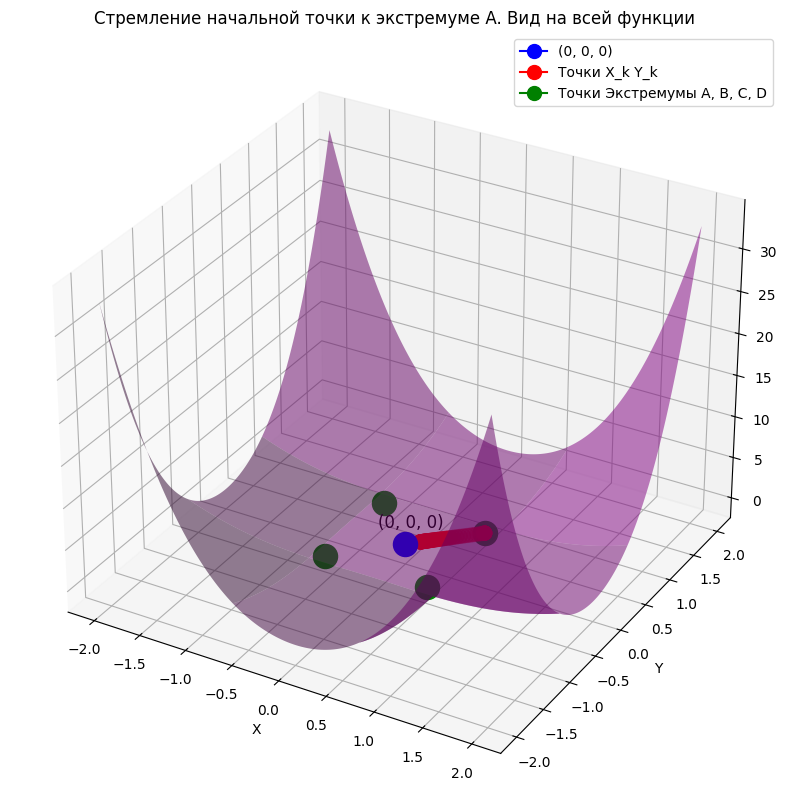

In [48]:
fig = plt.figure(figsize=(10, 10)) 
ax = fig.add_subplot(111, projection='3d')

# Создание сетки координат для построения поверхности
x_grid = np.linspace(-2, 2, 300)
y_grid = np.linspace(-2, 2, 300)
X, Y = np.meshgrid(x_grid, y_grid)

# Вычисление значений функции для каждой точки сетки
Z = np.array([[f.subs({x: x_val, y: y_val}).evalf() for x_val in x_grid] for y_val in y_grid])

# Построение точек
ax.scatter(0, 0, 0, color='blue', s=300)
ax.text(-0.3, 0, 1, '(0, 0, 0)', fontsize=12)

ax.scatter(x_points, y_points, z_points, color='r', s=100)

ax.scatter(e, e, z, color='g', s=300)

ax.scatter(e, -e, z, color='g', s=300)

ax.scatter(-e, e, z, color='g', s=300)

ax.scatter(-e, -e, z, color='g', s=300)

# Построение поверхности
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color='purple')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Добавление заголовка
ax.set_title('Стремление начальной точки к экстремуме A. Вид на всей функции')

# Legend
start_line = mlines.Line2D([], [], color='blue', marker='o', markersize=10, label='(0, 0, 0)')
points_line = mlines.Line2D([], [], color='red', marker='o', markersize=10, label='Точки X_k Y_k')
finish_line = mlines.Line2D([], [], color='green', marker='o', markersize=10, label='Точки Экстремумы A, B, C, D')
ax.legend(handles=[start_line, points_line, finish_line], loc='upper right')

plt.show()

## Приблизим, чтобы увидеть получше

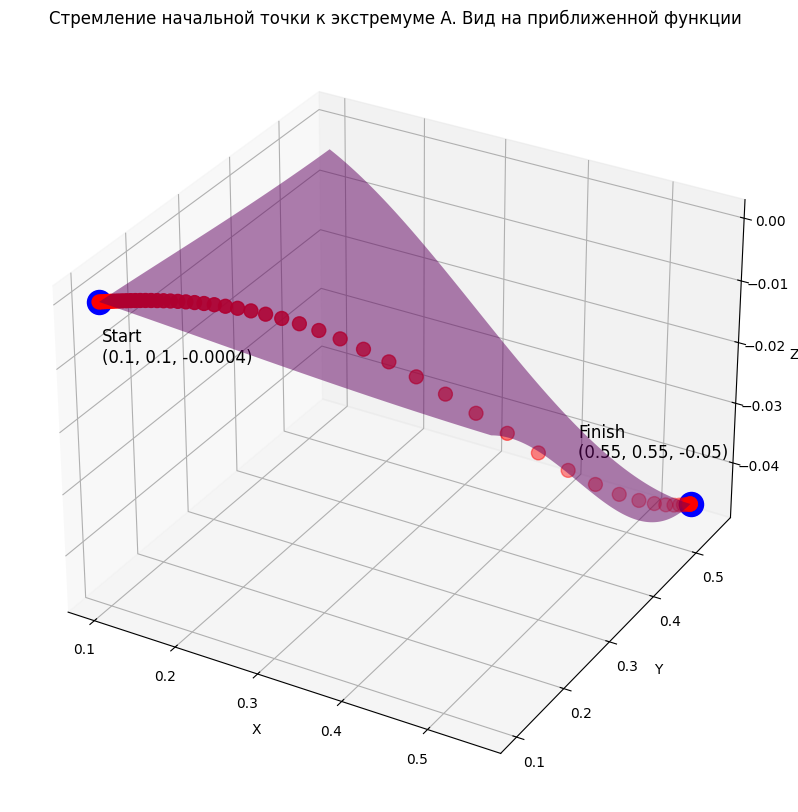

In [49]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Создание сетки координат для построения поверхности
x_grid = np.linspace(float(min(x_points)), float(max(x_points)), 100)
y_grid = np.linspace(float(min(y_points)), float(max(y_points)), 100)
X, Y = np.meshgrid(x_grid, y_grid)

# Вычисление значений функции для каждой точки сетки
Z = np.array([[f.subs({x: x_val, y: y_val}).evalf() for x_val in x_grid] for y_val in y_grid])
# Построение поверхности
ax.plot_surface(X, Y, Z, alpha=0.5, rstride=100, cstride=100, color='purple')

z = f.subs({x: 0.1, y: 0.1}).evalf() # старт

# Построение точек
ax.scatter(0.1, 0.1, z, color='blue', s=300)
ax.text(0.1, 0.1, z * 25, f'Start\n(0.1, 0.1, {z:.4f})', fontsize=12)

ax.scatter(x_points, y_points, z_points, color='r', s=100)

z = f.subs({x: e, y: e}).evalf()
ax.scatter(e, e, z, color='blue', s=300)
ax.text(e * 0.75, e, z * 0.95, f'Finish\n({e:.2f}, {e:.2f}, {z:.2f})', fontsize=12)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Добавление заголовка
ax.set_title('Стремление начальной точки к экстремуме A. Вид на приближенной функции')

plt.show()

## ССЫЛКА НА GEOGEBRA: https://www.geogebra.org/3d/jf5wnnjq

## ! МАТЕМАТИКА МАТЕМАТИКА МАТЕМАТИКА МАТЕМАТИКА !